# 实验2扩展：高级回归模型 (CART, SVR, MLP)
本实验在多元线性回归的基础上，进一步探讨决策树回归 (CART)、支持向量回归 (SVR) 和多层感知机 (MLP) 在房屋价格预测中的应用。

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 1. 数据读取与预处理
保持与实验2一致的数据处理步骤。

In [11]:
# 读取数据
df = pd.read_csv('./house_price_regression_dataset.csv')

# 特征工程：计算房龄
df['House_Age'] = 2025 - df['Year_Built']

# 删除 Year_Built
df = df.drop(columns='Year_Built')

# 提取特征和目标
X = df.drop(columns='House_Price')
y = df['House_Price']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

## 2. CART 决策树回归
使用 `DecisionTreeRegressor` 构建决策树模型。

In [12]:
# 构建决策树回归模型
cart_model = DecisionTreeRegressor(random_state=123)
cart_model.fit(X_train, y_train)

# 预测
y_pred_cart = cart_model.predict(X_test)

# 评估
mae_cart = mean_absolute_error(y_test, y_pred_cart)
mse_cart = mean_squared_error(y_test, y_pred_cart)
rmse_cart = np.sqrt(mse_cart)
r2_cart = r2_score(y_test, y_pred_cart)

print("--- CART 决策树回归 评估结果 ---")
print(f"平均绝对误差 (MAE): ${mae_cart:,.2f}")
print(f"均方误差 (MSE): ${mse_cart:,.2f}")
print(f"均方根误差 (RMSE): ${rmse_cart:,.2f}")
print(f"R² 得分: {r2_cart:.4f}")

--- CART 决策树回归 评估结果 ---
平均绝对误差 (MAE): $26,762.06
均方误差 (MSE): $1,088,461,542.76
均方根误差 (RMSE): $32,991.84
R² 得分: 0.9838


## 3. SVR 支持向量回归
使用 `SVR` 构建支持向量回归模型。

In [32]:
# 构建支持向量回归模型
svr_model = SVR(kernel='linear', C=1000)
svr_model.fit(X_train, y_train)

# 预测
y_pred_svr = svr_model.predict(X_test)

# 评估
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("--- SVR 支持向量回归 评估结果 ---")
print(f"平均绝对误差 (MAE): ${mae_svr:,.2f}")
print(f"均方误差 (MSE): ${mse_svr:,.2f}")
print(f"均方根误差 (RMSE): ${rmse_svr:,.2f}")
print(f"R² 得分: {r2_svr:.4f}")

--- SVR 支持向量回归 评估结果 ---
平均绝对误差 (MAE): $9,277.29
均方误差 (MSE): $131,305,994.95
均方根误差 (RMSE): $11,458.88
R² 得分: 0.9980


## 4. MLP 多层感知机
使用 `MLPRegressor` 构建神经网络模型。

In [30]:
# 构建多层感知机回归模型
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=123)
mlp_model.fit(X_train, y_train)

# 预测
y_pred_mlp = mlp_model.predict(X_test)

# 评估
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("--- MLP 多层感知机 评估结果 ---")
print(f"平均绝对误差 (MAE): ${mae_mlp:,.2f}")
print(f"均方误差 (MSE): ${mse_mlp:,.2f}")
print(f"均方根误差 (RMSE): ${rmse_mlp:,.2f}")
print(f"R² 得分: {r2_mlp:.4f}")

--- MLP 多层感知机 评估结果 ---
平均绝对误差 (MAE): $62,365.22
均方误差 (MSE): $5,861,779,030.15
均方根误差 (RMSE): $76,562.26
R² 得分: 0.9126


c:\Users\liand\miniconda3\envs\run_ensem\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## 5. 模型性能对比
汇总各模型的评估指标，并进行可视化对比。

                Model           MAE           MSE          RMSE        R2
0  CART Decision Tree  26762.062290  1.088462e+09  32991.840548  0.983762
1                 SVR   9277.285739  1.313060e+08  11458.882797  0.998041
2  MLP Neural Network  62365.219590  5.861779e+09  76562.255911  0.912551


c:\Users\liand\miniconda3\envs\run_ensem\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


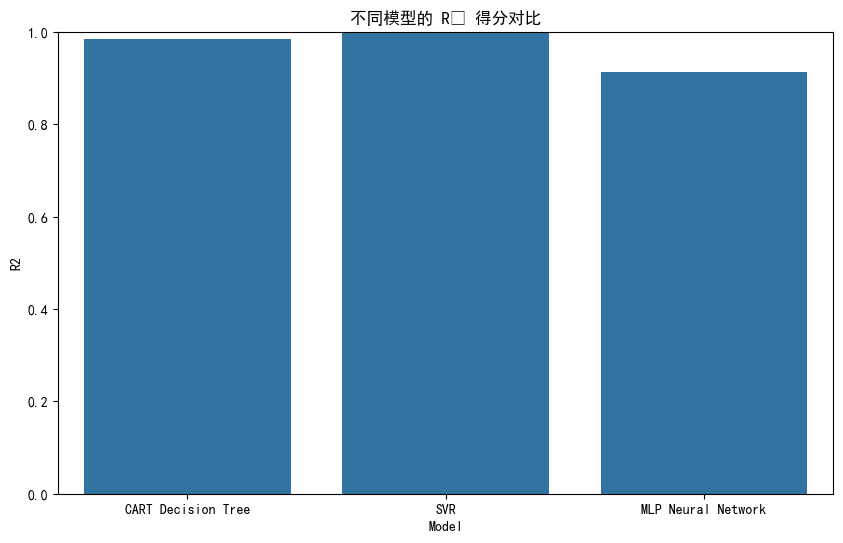

In [31]:
# 构建结果 DataFrame
results_data = {
    'Model': ['CART Decision Tree', 'SVR', 'MLP Neural Network'],
    'MAE': [mae_cart, mae_svr, mae_mlp],
    'MSE': [mse_cart, mse_svr, mse_mlp],
    'RMSE': [rmse_cart, rmse_svr, rmse_mlp],
    'R2': [r2_cart, r2_svr, r2_mlp]
}

results_df = pd.DataFrame(results_data)
print(results_df)

# 可视化 R2 比较
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('不同模型的 R² 得分对比')
plt.ylim(0, 1)
plt.show()